In [ ]:
# pip install imblearn   
# pip install imbalanced-learn

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd

# 生成不平衡数据集

0    1000
1     100
Name: count, dtype: int64

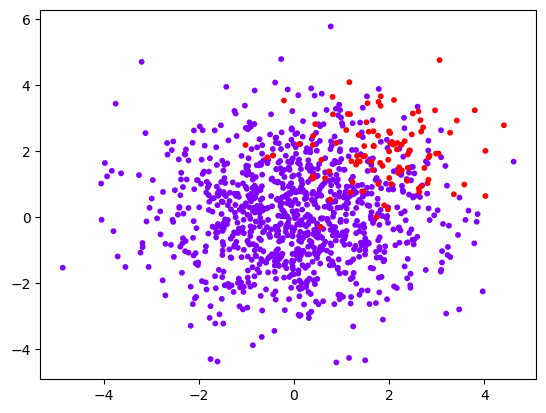

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
class_1 = 1000       #类别1有1000个样本
class_2 = 100        #类别2只有100个
centers = [[0,0], [2.0, 2.0]]         #设定两个类别的中心
clusters_std = [1.5, 1]             #设定两个类别的标准差，通常来说，样本量比较大的类别会更加松散
X, y = make_blobs(n_samples= [class_1, class_2],
                  centers= centers,
                  cluster_std= clusters_std,
                  random_state= 42, shuffle= False)
# 画图看数据集，其中红色点是少数类，紫色点是多数类
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = "rainbow",s = 10)
# 查看不平衡的样本数量
pd.DataFrame(y).value_counts()

# Over-sampling 过采样
最简单的过采样方法是对少数类别样本做简单复制，例如sklearn库中的calss_weight参数采用的就是此方法。  
进阶的过采样方法为插值法（interpolation），主要有**SMOTE**和**ADASYN**两种方法。需要注意的是，插值法可能会在多数类样本中间插值出一个少数类样本导致类别重叠。  
## SMOTE
全称Synthetic Minority Oversampling Technique.  
算法如下：  
1. 计算采样比例N，（默认N= 多数样本量/少数样本量）
2. 对每一个少数类样本$x_i$，从其k近邻个少数类样本中有放回地随机抽样N-1个，记为$x_{ik}$。  
3. 分别与原样本$x_i$按照如下的公式生成新的插值样本  
$$x_{new}=x_i+rand(0,1)*(x_i-x_{ik})$$  

重复进行，直到满足停止条件。  
参考文献：Nitesh V Chawla, Kevin W Bowyer, Lawrence O Hall, and W Philip Kegelmeyer. Smote: synthetic minority over-sampling technique. Journal of artificial intelligence research, 16:321–357, 2002.  

0    1000
1    1000
Name: count, dtype: int64

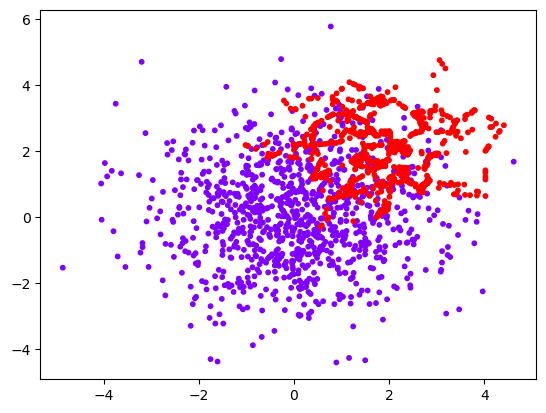

In [3]:
# SMOTE过采样
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42)
X_sm, Y_sm = smote.fit_resample(X, y)

# 查看采样后的比例
pd.DataFrame(Y_sm).value_counts()

# 画图看过采样后的数据集
plt.scatter(X_sm[:, 0], X_sm[:, 1], c = Y_sm, cmap = "rainbow",s = 10)

0    1000
1     500
Name: count, dtype: int64

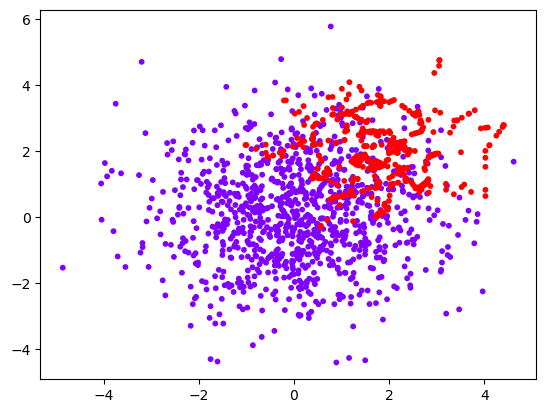

In [4]:
# 调整采样比例
smote = SMOTE(sampling_strategy = 0.5, random_state = 42)
X_sm, Y_sm = smote.fit_resample(X, y)
# 查看采样后的比例
pd.DataFrame(Y_sm).value_counts()
# 画图看过采样后的数据集
plt.scatter(X_sm[:, 0], X_sm[:, 1], c = Y_sm, cmap = "rainbow",s = 10)

## ADASYN
全称Adaptive Synthetic.  
算法流程：
1. 对于每一个少数类样本$x_i$，选择其k个近邻的样本$x_{ik}$。注意这里的k个近邻样本的选择不区分多数与少数类。 
2. 计算这K个近邻样本中多数类的比例$r_i$
3. 标准化$r_i$得到采样比例，公式为$\hat{r_i}=r_i/\sum_{i=1}^m{r_i}$。标准化后使$\sum_i\hat{r_i}=1$。
4. 对每个少数类样本，依照采样比例$\hat{r_i}$使用SMOTE方法得到插值样本。  

可以发现，ADASYN方法更倾向于在多数类样本的附近生成新的插值样本。

参考文献：Haibo He, Yang Bai, Edwardo A Garcia, and Shutao Li. Adasyn: adaptive synthetic sampling approach for imbalanced learning. In 2008 IEEE International Joint Conference on Neural Networks (IEEE World Congress on Computational Intelligence), 1322–1328. IEEE, 2008.

0    1000
1     994
Name: count, dtype: int64

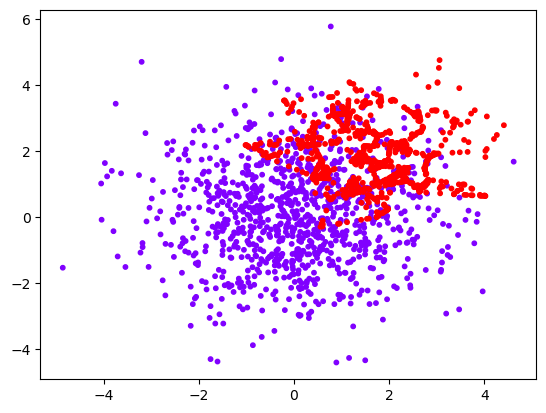

In [5]:
# ADASYN过采样
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state = 42)
X_ada, Y_ada = adasyn.fit_resample(X, y)

# 查看采样后的比例
pd.DataFrame(Y_ada).value_counts()

# 画图看过采样后的数据集
plt.scatter(X_ada[:, 0], X_ada[:, 1], c = Y_ada, cmap = "rainbow",s = 10)

# Under-sampling欠采样
## Controlled under-sampling
常用的是Random under-sampling，即随机删除多数类样本。这是唯一一种可以精确设置欠采样样本数量的常用欠采样算法，因此冠以Controlled名号。

0    200
1    100
Name: count, dtype: int64

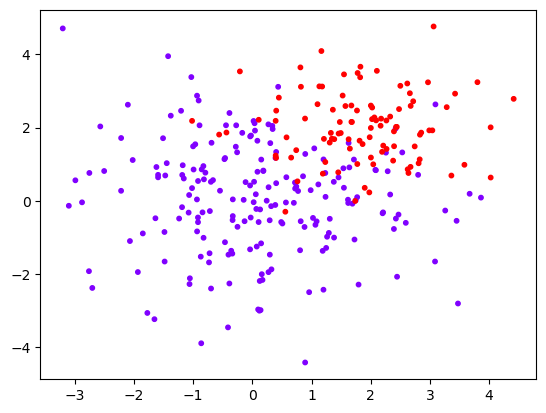

In [10]:
# Random欠采样
from imblearn.under_sampling import RandomUnderSampler

rus= RandomUnderSampler(sampling_strategy= 0.5, random_state= 42)   # sampling_strategy=1，控制采样比例
X_rus, Y_rus = rus.fit_resample(X, y)

# 查看采样后的比例
pd.DataFrame(Y_rus).value_counts()

# 画图看过采样后的数据集
plt.scatter(X_rus[:, 0], X_rus[:, 1], c = Y_rus, cmap = "rainbow",s = 10)

## Cleaning under-sampling
Cleaning类的欠采样算法无法精确控制欠采样样本的数量
### TomekLinks
当多数类的某样本y和少数类的某样本x，与另外任意样本z，之间的距离d()存在以下关系
$$d(x,y)<d(x,z)\qquad and\qquad d(x,y)<d(y,z)$$
则称x与y之间存在Tomek Link，此时算法可删除多数类样本y以实现欠采样。  
可以发现，TomekLinks算法不适合对有清晰边界的两类样本做欠采样。  
参考文献：Ivan Tomek. Two modifications of cnn. IEEE Trans. Systems, Man and Cybernetics, 6:769–772, 1976.

0    969
1    100
Name: count, dtype: int64

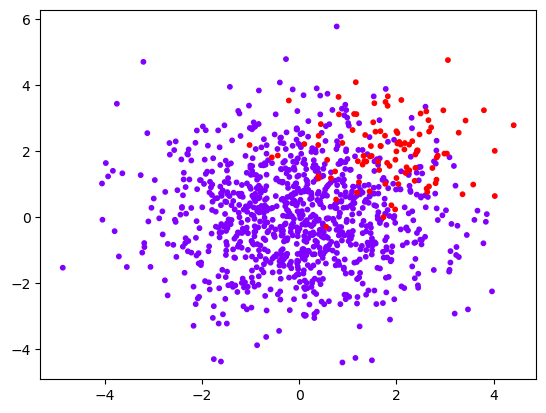

In [11]:
# TomekLinks欠采样
from imblearn.under_sampling import TomekLinks

tl= TomekLinks()
X_tl, Y_tl= tl.fit_resample(X, y)

# 查看采样后的比例
pd.DataFrame(Y_tl).value_counts()

# 画图看过采样后的数据集
plt.scatter(X_tl[:, 0], X_tl[:, 1], c = Y_tl, cmap = "rainbow",s = 10)

### Edited nearest neighbours
算法思路是应用最近邻算法来编辑(edit)数据集, 找出那些与邻居不太友好的样本然后移除。  
具体来说，对每一个多数类样本$x_i$，若其k近邻的全部/大多数样本是多数类，则该多数类样本$x_i$会被保留，否则会被移除。  
参考文献：Dennis L Wilson. Asymptotic properties of nearest neighbor rules using edited data. IEEE Transactions on Systems, Man, and Cybernetics, pages 408–421, 1972.

0    604
1    100
Name: count, dtype: int64

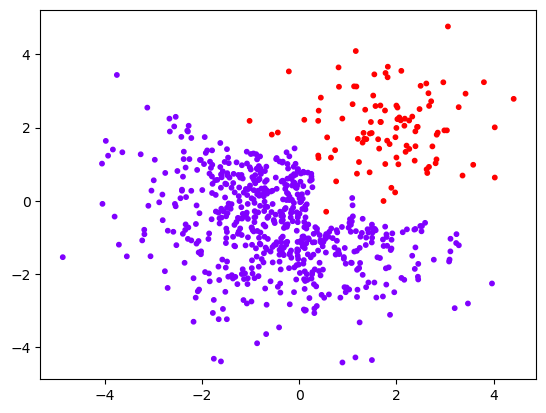

In [15]:
# ENN欠采样
from imblearn.under_sampling import EditedNearestNeighbours

enn= EditedNearestNeighbours(n_neighbors= 42)  # 改变n_neighbors=3 参数以观察欠采样结果
X_enn, Y_enn= enn.fit_resample(X, y)

# 查看采样后的比例
pd.DataFrame(Y_enn).value_counts()

# 画图看过采样后的数据集
plt.scatter(X_enn[:, 0], X_enn[:, 1], c = Y_enn, cmap = "rainbow",s = 10)

# Combination sampling联合采样

如果多数类样本有离群值，SMOTE等过采样方法容易在多数类样本中间错误地插入少数类插值，导致类别重叠。这些问题插值可以通过联合使用欠采样方法来解决。  
这里我们分别将Tomeks link和Edited nearest-neighbours联接在SMOTE之后，来清除过采样生成的问题插值，以得到一个尽量干净的数据空间。

0    948
1    948
Name: count, dtype: int64

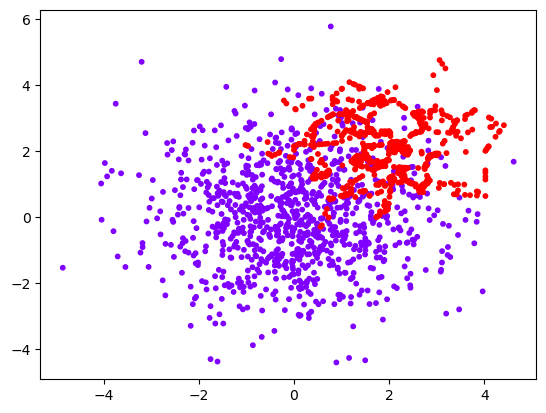

In [16]:
# SMOTE叠加TomekLink
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(random_state= 42)
X_smote_tomek, Y_smote_tomek= smote_tomek.fit_resample(X, y)

# 查看采样后的比例
pd.DataFrame(Y_smote_tomek).value_counts()

# 画图看过采样后的数据集
plt.scatter(X_smote_tomek[:, 0], X_smote_tomek[:, 1], c = Y_smote_tomek, cmap = "rainbow",s = 10)

0    794
1    789
Name: count, dtype: int64

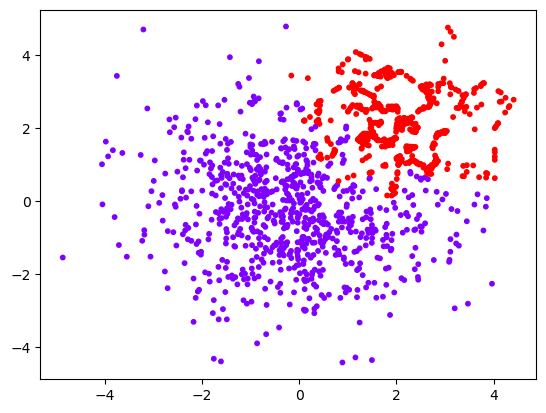

In [17]:
# SMOTE叠加ENN
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state= 42)
X_smote_enn, Y_smote_enn= smote_enn.fit_resample(X, y)

# 查看采样后的比例
pd.DataFrame(Y_smote_enn).value_counts()

# 画图看过采样后的数据集
plt.scatter(X_smote_enn[:, 0], X_smote_enn[:, 1], c = Y_smote_enn, cmap = "rainbow",s = 10)

# 实践问题（SMOTENC）

In [19]:
# 加载案例数据并处理
df=pd.read_csv('./data/保险数据_全部数据.csv')
df1= df.dropna()
labels= df1.pop("resp_flag")

# 数据类型区分
cat_cols= df1.select_dtypes(include=["object"])   # 分类型变量
num_cols= df1.select_dtypes(include=["int", "float"])   # 数值型变量

# 数据编码
from sklearn.preprocessing import OrdinalEncoder
cat_encode= OrdinalEncoder()
cat_trans= cat_encode.fit_transform(cat_cols)
df_cat= pd.DataFrame(cat_trans, columns= cat_cols.columns)

# 数据标准化
from sklearn.preprocessing import StandardScaler
num_std= StandardScaler()
num_trans= num_std.fit_transform(num_cols)
df_num= pd.DataFrame(num_trans, columns= num_cols.columns)

# 数据合并
data= pd.concat([df_cat, df_num], axis= 1)

In [20]:
# SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42)
X_sm, Y_sm = smote.fit_resample(data, labels)

# 查看采样后的比例
pd.DataFrame(Y_sm).value_counts()

resp_flag
0            26105
1            26105
Name: count, dtype: int64

In [27]:
data.values

array([[ 1.        ,  0.        ,  0.        , ..., -1.02908768,
         0.03802252,  1.16305434],
       [ 1.        ,  0.        ,  0.        , ..., -0.72618728,
        -0.52328933, -0.45517988],
       [ 0.        ,  0.        ,  0.        , ...,  0.93976492,
         0.8799903 ,  1.48670118],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.72618728,
        -0.80394525,  1.16305434],
       [ 1.        ,  0.        ,  0.        , ...,  2.07564143,
        -0.52328933,  0.19211381],
       [ 1.        ,  0.        ,  0.        , ...,  0.71258962,
        -0.80394525, -0.77882672]])

In [28]:
# SMOTENC（谨慎运行）
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features= cat_cols.columns)
X_resampled, y_resampled = smote_nc.fit_resample(data, labels)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()